In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from keras import Sequential
from keras.layers import SimpleRNN, GRU, LSTM, Dense, Bidirectional

2025-07-23 22:43:04.582684: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-23 22:43:04.601684: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv',index_col=0)
df

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [ ]:
minv = df['Passengers'].min()
maxv = df['Passengers'].max()
df['Passengers'] = (df['Passengers'] - minv) / (maxv - minv) # Normalize the 'Passengers' column to the range [0, 1]

df['Passengers2'] = df['Passengers'].shift(-1) # Create a new column 'Passengers2' which is the next value of 'Passengers'

df = df[:-1] # Remove the last row since it has NaN in 'Passengers2'

thr = int(len(df) * 0.67) # Split the data into training and testing sets (67% train, 33% test)
train_df = df[:thr]
test_df = df[thr:]

trainX = np.expand_dims(train_df['Passengers'].values, axis=(1,2)) 
trainY = train_df['Passengers2'].values

testX = np.expand_dims(test_df['Passengers'].values, axis=(1,2))
testY = test_df['Passengers2'].values

In [4]:
df

,Passengers,Passengers2
Month,,
1949-01,0.015444,0.027027
1949-02,0.027027,0.054054
1949-03,0.054054,0.048263
1949-04,0.048263,0.032819
1949-05,0.032819,0.059846
...,...,...
1960-07,1.000000,0.969112
1960-08,0.969112,0.779923
1960-09,0.779923,0.689189


In [10]:
from tqdm.keras import TqdmCallback

results_dict = {} # Dictionary to store results for each model

for bdr in [True, False]:
    for tp in [SimpleRNN, GRU, LSTM]:
        for units in [2, 8, 16]:
            model = Sequential()
            if bdr:
                model.add(Bidirectional(tp(units, input_shape=(1, 1))) )
            else:
                model.add(tp(units, input_shape=(1, 1)))

            model.add(Dense(1))
            
            model.compile(loss='mse', optimizer='adam')

            print(tp.__name__, f"Bidirectional={bdr}", 'units:', units)
            
            history = model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=0, callbacks=[TqdmCallback(verbose=0)])

            trainPredict = model.predict(trainX, verbose=0)
            testPredict = model.predict(testX, verbose=0)

            results_dict.setdefault(tp.__name__, {}).setdefault(f"Bidirectional={bdr}", {})[units] = {'train_p': trainPredict, 'test_p': testPredict}
        
        

SimpleRNN Bidirectional=True units: 2


0epoch [00:00, ?epoch/s]

100%|██████████| 25/25 [00:02<00:00,  9.75epoch/s, loss=0.00204]


SimpleRNN Bidirectional=True units: 8


100%|██████████| 25/25 [00:02<00:00, 10.70epoch/s, loss=0.00215]


SimpleRNN Bidirectional=True units: 16


100%|██████████| 25/25 [00:02<00:00, 10.71epoch/s, loss=0.0028] 


GRU Bidirectional=True units: 2


100%|██████████| 25/25 [00:02<00:00,  8.54epoch/s, loss=0.00215]


GRU Bidirectional=True units: 8


100%|██████████| 25/25 [00:02<00:00,  9.07epoch/s, loss=0.00214]


GRU Bidirectional=True units: 16


100%|██████████| 25/25 [00:02<00:00,  8.85epoch/s, loss=0.00239]


LSTM Bidirectional=True units: 2


100%|██████████| 25/25 [00:02<00:00,  9.46epoch/s, loss=0.00202]


LSTM Bidirectional=True units: 8


100%|██████████| 25/25 [00:02<00:00,  8.63epoch/s, loss=0.00211]


LSTM Bidirectional=True units: 16


100%|██████████| 25/25 [00:02<00:00,  9.10epoch/s, loss=0.00215]


SimpleRNN Bidirectional=False units: 2


100%|██████████| 25/25 [00:01<00:00, 14.97epoch/s, loss=0.0183]


SimpleRNN Bidirectional=False units: 8


100%|██████████| 25/25 [00:01<00:00, 15.05epoch/s, loss=0.00205]


SimpleRNN Bidirectional=False units: 16


100%|██████████| 25/25 [00:01<00:00, 14.89epoch/s, loss=0.00208]


GRU Bidirectional=False units: 2


100%|██████████| 25/25 [00:01<00:00, 12.97epoch/s, loss=0.00205]


GRU Bidirectional=False units: 8


100%|██████████| 25/25 [00:02<00:00, 11.31epoch/s, loss=0.00207]


GRU Bidirectional=False units: 16


100%|██████████| 25/25 [00:01<00:00, 12.66epoch/s, loss=0.0021] 


LSTM Bidirectional=False units: 2


100%|██████████| 25/25 [00:01<00:00, 13.20epoch/s, loss=0.00864]


LSTM Bidirectional=False units: 8


100%|██████████| 25/25 [00:01<00:00, 13.49epoch/s, loss=0.00206]


LSTM Bidirectional=False units: 16


100%|██████████| 25/25 [00:01<00:00, 13.30epoch/s, loss=0.00219]


In [11]:
def renormalize(data):
    return data * (maxv - minv) + minv

In [12]:
for e in results_dict:
    print(e)

SimpleRNN
GRU
LSTM


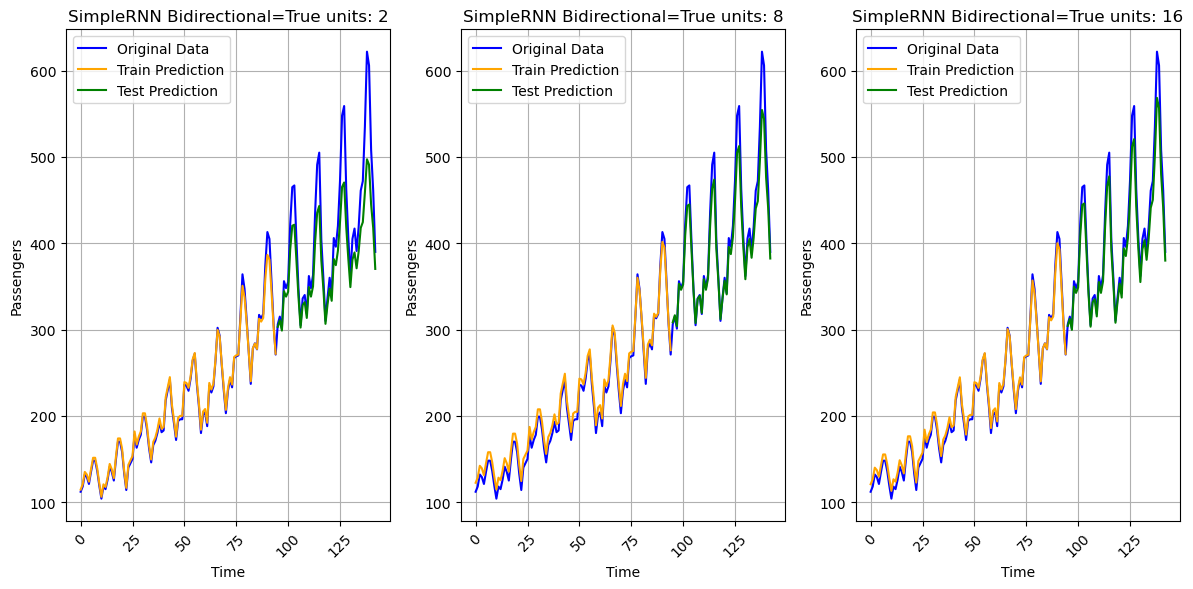

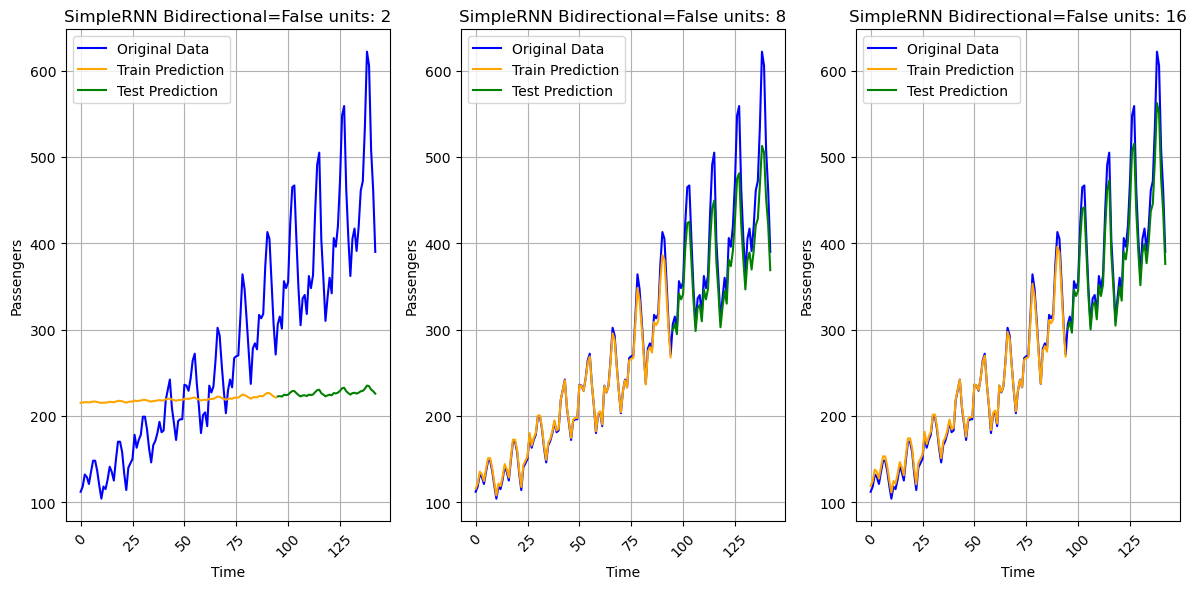

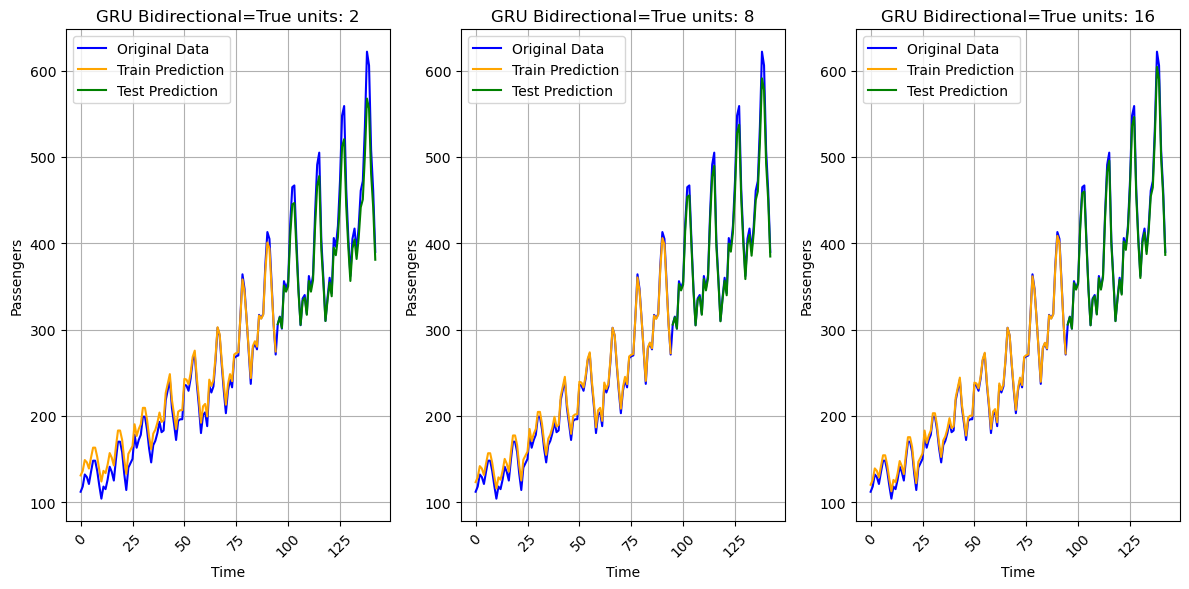

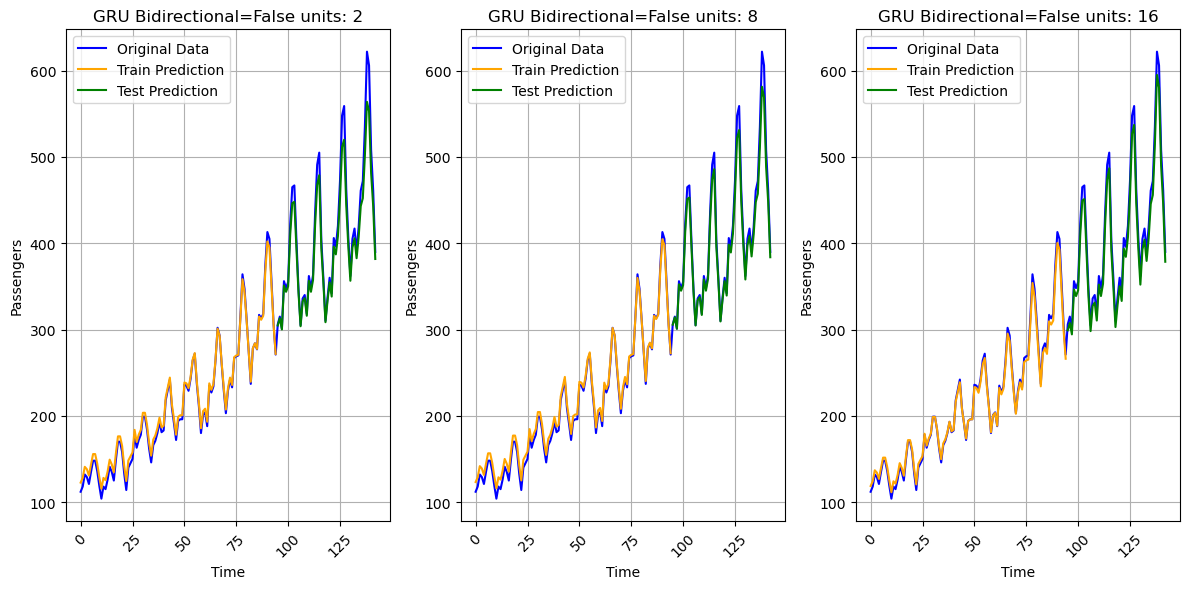

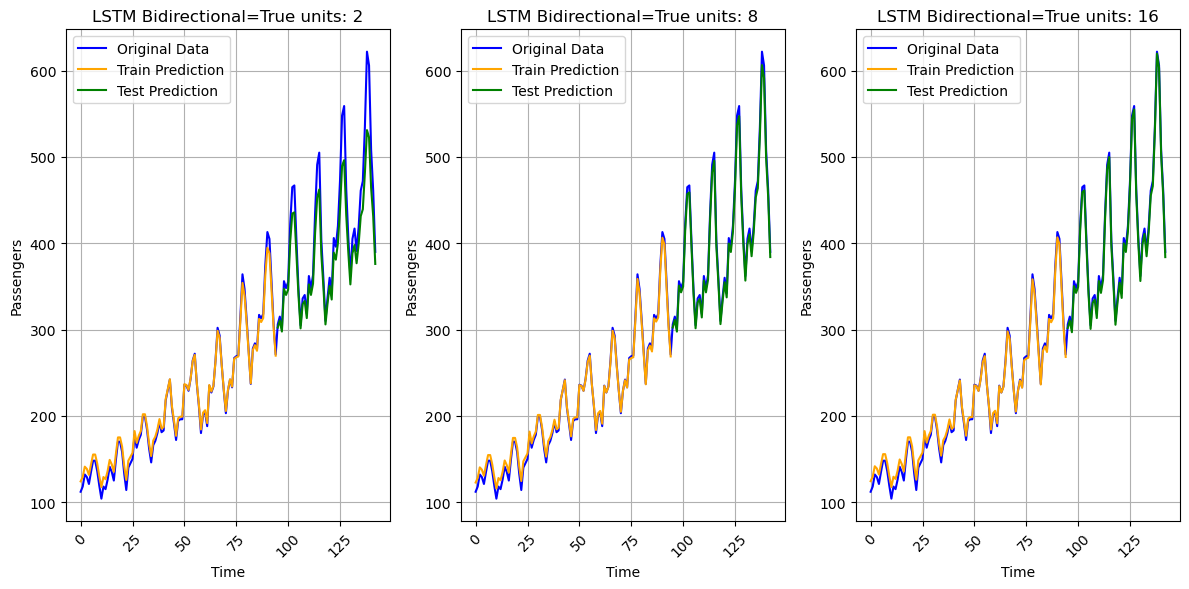

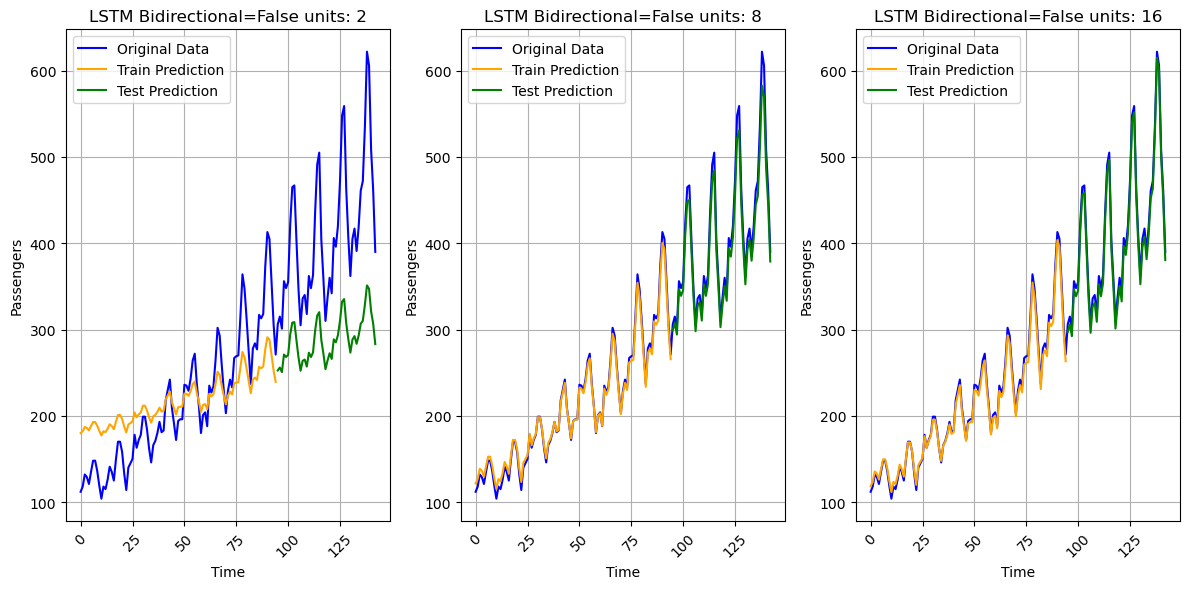

In [13]:
for cell, d1 in results_dict.items():
    for bdr, d2 in d1.items():
        plt.figure(figsize=(12, 6))
        for i, (units, metrics) in enumerate(d2.items()):

            plt.subplot(1, len(d2), i + 1)

            plt.plot(renormalize(df['Passengers'].values), label='Original Data', color='blue')
            plt.plot(renormalize(metrics['train_p']), label='Train Prediction', color='orange')

            plt.plot(range(thr, len(df)), renormalize(metrics['test_p']), label='Test Prediction', color='green')
            plt.xlabel('Time')
            plt.ylabel('Passengers')
            plt.xticks(rotation=45)
            plt.grid()
            plt.tight_layout()
            plt.title(f"{cell} {bdr} units: {units}")
            plt.legend()

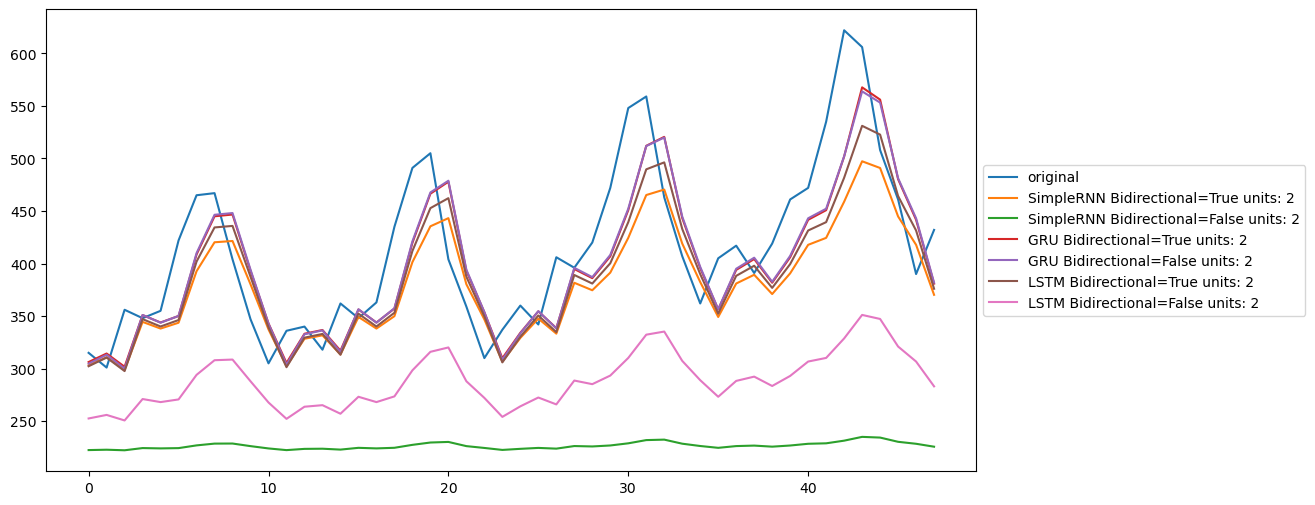

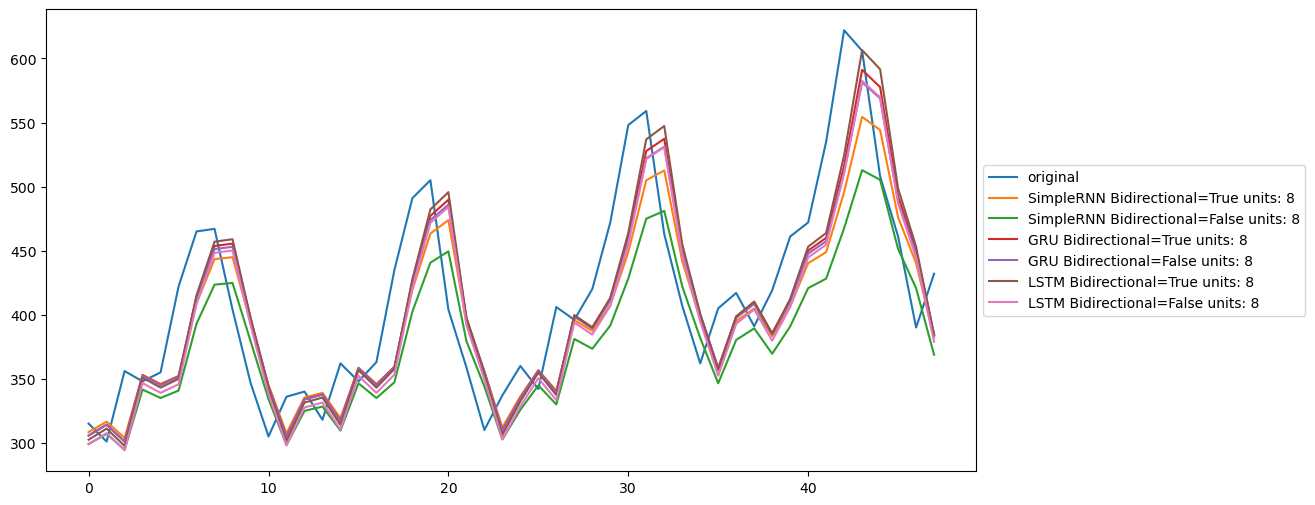

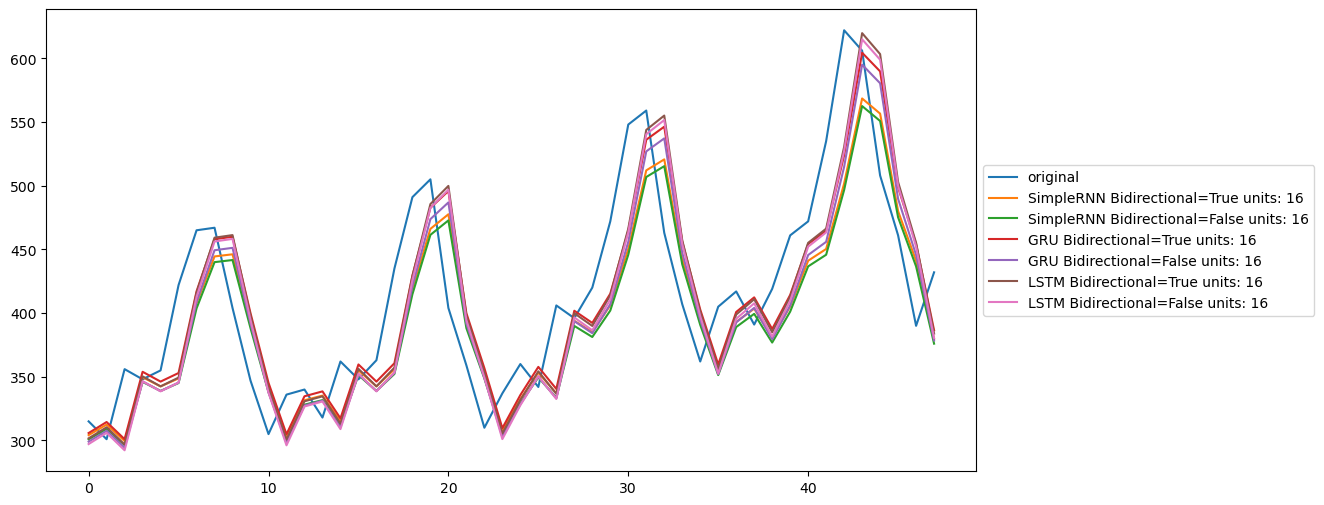

In [15]:
for i, units in enumerate([2, 8, 16]):
    plt.figure(figsize=(12, 6))
    plt.plot(renormalize(testY), label='original')
    for cell, d1 in results_dict.items():
        for bdr, d2 in d1.items():
            plt.plot( renormalize(d2[units]['test_p']), label=f"{cell} {bdr} units: {units}")
            plt.title
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()